# Sensitivity analysis performed on Florentine families example

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "..")))
from LSMN_P import *

<div align="center">

|  | $\sigma_{\mathbf{z}}$ | $\sigma_{\alpha}$ |
|:-----------:|:-----------:|:-----------:|
| Configuration 1    | 5.0   | 5.0   |
| Configuration 2    | 1.0   | 5.0   |
| Configuration 3    | 5.0   | 1.0   |
| Configuration 4    | 1.0   | 1.0   |

</div>
---
<div align="center">

|  | $\rho$ | $\mu_{\beta}$ | $\sigma_{\alpha}$ | $\sigma_{\beta}$ |
|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
| Configuration 1    | -0.5   | 5.0   | 1.0   | 1.0   |
| Configuration 2    | -0.5   | 5.0   | 1.0   | 5.0   |
| Configuration 3    | -0.5   | 5.0   | 5.0   | 1.0   |
| Configuration 4    | -0.5   | 5.0   | 5.0   | 5.0   |
| Configuration 5    | -0.5   | 10.0   | 1.0   | 1.0   |
| Configuration 6    | -0.5   | 10.0   | 1.0   | 5.0   |
| Configuration 7    | -0.5   | 10.0   | 5.0   | 1.0   |
| Configuration 8    | -0.5   | 10.0   | 5.0   | 5.0   |
| Configuration 9    | 0.0  | 5.0   | 1.0   | 1.0   |
| Configuration 10   | 0.0   | 5.0   | 1.0   | 5.0   |
| Configuration 11   | 0.0   | 5.0   | 5.0   | 1.0   |
| Configuration 12   | 0.0   | 5.0   | 5.0   | 5.0   |
| Configuration 13   | 0.0   | 10.0   | 1.0   | 1.0   |
| Configuration 14   | 0.0   | 10.0   | 1.0   | 5.0   |
| Configuration 15   | 0.0   | 10.0   | 5.0   | 1.0  |
| Configuration 16   | 0.0   | 10.0   | 5.0   | 5.0   |


</div>

# Network

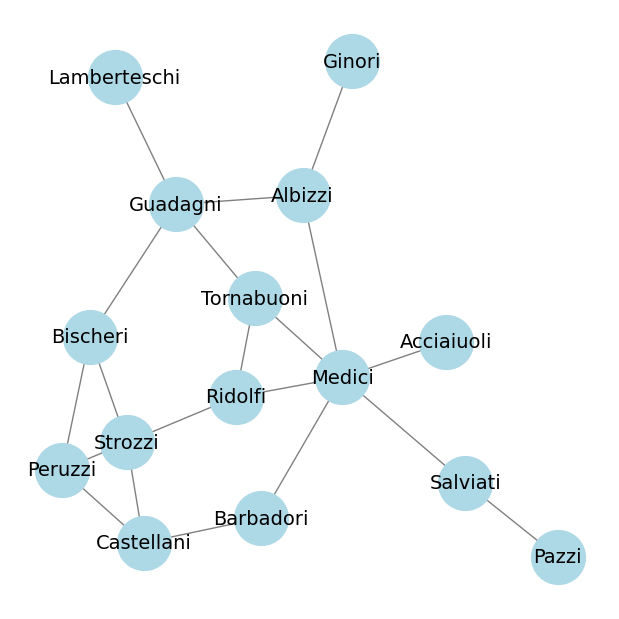

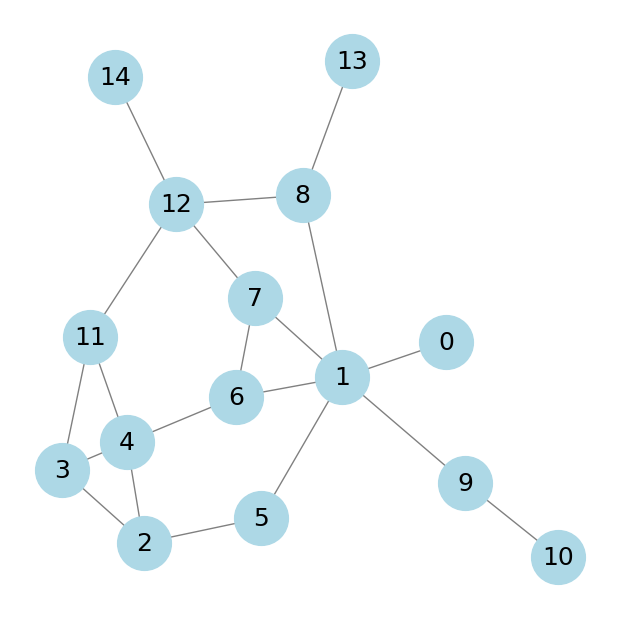

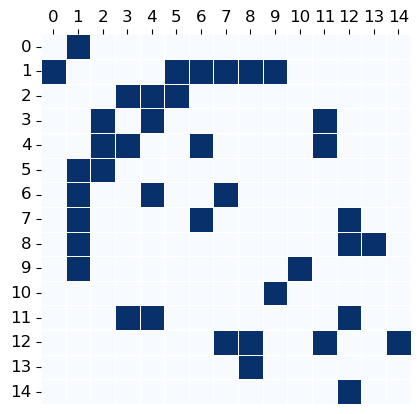

In [3]:
G = nx.florentine_families_graph()
pos = nx.spring_layout(G, seed=80)
plt.figure(figsize=(6,6))
nx.draw(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=14)
#plt.title("Florentine Families network")
plt.show()

G = nx.florentine_families_graph()
node_mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, node_mapping)
n = len(G.nodes)
plt.figure(figsize=(6,6))
pos_relabel = {node_mapping[k]: v for k, v in pos.items()}
nx.draw(G,  pos=pos_relabel, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=18)
#plt.title("Florentine Families network with relabeled nodes")
plt.show()
#print("Map from original nodes to new nodes:")
#print(node_mapping)

Y = nx.to_numpy_array(G, dtype=float)

sns.heatmap(Y, annot=False, cmap="Blues", cbar=False, square=True, linewidths=0.5, linecolor='white')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.gca().xaxis.tick_top() 
plt.gca().tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, labelsize=12)
#plt.title("Sociomatrix for Florentine families")
plt.show() 

# Model $\mathbb{R}^1$

In [4]:
# Different configurations for prior distribution

Theta_R1_Conf_1 = {
    'Z0': np.random.normal(0, 1, size=(n, 1)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 5.0,
    'sigma_prior_alpha': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}
Theta_R1_Conf_2 = {
    'Z0': np.random.normal(0, 1, size=(n, 1)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 1.0,
    'sigma_prior_alpha': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}
Theta_R1_Conf_3 = {
    'Z0': np.random.normal(0, 1, size=(n, 1)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 5.0,
    'sigma_prior_alpha': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}
Theta_R1_Conf_4 = {
    'Z0': np.random.normal(0, 1, size=(n, 1)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 1.0,
    'sigma_prior_alpha': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}


In [5]:
# Execution of the model with different prior distributions

resultsR1_Conf_1 = Estimation_LSMN(Y, Theta_R1_Conf_1, Model="Euclidean")

resultsR1_Conf_2 = Estimation_LSMN(Y, Theta_R1_Conf_2, Model="Euclidean")

resultsR1_Conf_3 = Estimation_LSMN(Y, Theta_R1_Conf_3, Model="Euclidean")

resultsR1_Conf_4 = Estimation_LSMN(Y, Theta_R1_Conf_4, Model="Euclidean")

Metropolis-Hastings for Euclidean latent space models on networks
Number of chains: 2
MH samples of size 500 with burn-in 5000 and thinning 25
Number of draws per chain: 17500
Initial sigma_q_Z: 1.0000
Initial sigma_q_alpha: 1.0000
Log-likelihood: Bernoulli
------------------------------------------------------------
Searching for MLE using gradient ascent
Best log-likelihood after 20 starts: -44.6275
------------------------------------------------------------
Log-prior:
sigma_prior_Z:  5.0
sigma_prior_alpha:  5.0
********************************
Chain 0
********************************


Sampling progress:  29%|██▊       | 5004/17500 [01:47<05:02, 41.36 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 3.0000
Final sigma_q_alpha: 0.8224


Sampling progress: 100%|██████████| 17500/17500 [06:36<00:00, 44.16 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5009/17500 [01:45<04:06, 50.75 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 3.0000
Final sigma_q_alpha: 0.8911


Sampling progress: 100%|██████████| 17500/17500 [06:21<00:00, 45.91 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9991
Maximum R-hat: 0.9994
Minimum ESS/n: 0.5522
Maximum ESS/n: 0.7165
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -55.2449         -40.7308         -95.9757
ML                 -44.6275         -43.0552         -87.6827
CM                 -46.3185         -42.5503         -88.8687
MAP                -35.1416         -42.9701         -78.1117
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 196.7484
DIC: 194.6935
BIC: 249.3912

Final acceptance rate Z: 0.3819
Final acceptance rate alpha: 0.3776
********************************
E

Sampling progress:  29%|██▊       | 5008/17500 [01:53<04:49, 43.21 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.7137
Final sigma_q_alpha: 0.7477


Sampling progress: 100%|██████████| 17500/17500 [06:40<00:00, 43.68 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5008/17500 [01:51<04:14, 49.08 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.6303
Final sigma_q_alpha: 0.8822


Sampling progress: 100%|██████████| 17500/17500 [06:31<00:00, 44.72 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9997
Maximum R-hat: 1.0012
Minimum ESS/n: 0.9023
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -58.2355         -21.6694         -79.9049
ML                 -41.6296         -28.9896         -70.6191
CM                 -42.7706         -23.4456         -66.2162
MAP                -45.9257         -19.8282         -65.7539
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 175.8626
DIC: 176.1254
BIC: 235.1998

Final acceptance rate Z: 0.4387
Final acceptance rate alpha: 0.3414
********************************
E

Sampling progress:  29%|██▊       | 5009/17500 [01:38<03:45, 55.45 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 3.0000
Final sigma_q_alpha: 0.9752


Sampling progress: 100%|██████████| 17500/17500 [05:42<00:00, 51.07 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5006/17500 [01:36<04:56, 42.10 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 3.0000
Final sigma_q_alpha: 0.9276


Sampling progress: 100%|██████████| 17500/17500 [05:52<00:00, 49.63 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 1.0026
Maximum R-hat: 1.0094
Minimum ESS/n: 0.5274
Maximum ESS/n: 0.6567
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -65.4455         -39.1572        -104.6027
ML                 -44.2393         -40.0522         -84.2915
CM                 -47.8235         -42.1442         -89.9677
MAP                -35.9328         -41.9698         -77.9026
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 203.8446
DIC: 198.3424
BIC: 255.4114

Final acceptance rate Z: 0.3799
Final acceptance rate alpha: 0.3507
********************************
E

Sampling progress:  29%|██▊       | 5003/17500 [01:39<04:00, 51.86 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.8376
Final sigma_q_alpha: 0.6433


Sampling progress: 100%|██████████| 17500/17500 [05:46<00:00, 50.45 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5011/17500 [01:51<04:00, 52.00 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.7924
Final sigma_q_alpha: 0.7365


Sampling progress: 100%|██████████| 17500/17500 [06:07<00:00, 47.59 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9992
Maximum R-hat: 0.9999
Minimum ESS/n: 1.0000
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -55.6736         -19.6788         -75.3524
ML                 -42.9982         -23.9237         -66.9219
CM                 -43.4770         -21.4166         -64.8936
MAP                -44.1949         -20.4056         -64.6005
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 178.3436
DIC: 178.5091
BIC: 238.0252

Final acceptance rate Z: 0.4128
Final acceptance rate alpha: 0.3842
********************************
E

In [6]:
# Comparison of the model with different parameters for prior distributions

resultsR1 = {
    'R1_C1': resultsR1_Conf_1,
    'R1_C2': resultsR1_Conf_2,
    'R1_C3': resultsR1_Conf_3,
    'R1_C4': resultsR1_Conf_4
}

df_comparison_R1 = model_comparison(resultsR1)
df_comparison_R1

,Model,WAIC,DIC,BIC,mean_log_likelihood,ml_log_likelihood,cm_log_likelihood,map_log_likelihood,min_Rhat,max_Rhat,...,False positive,False negative,p_value_density,p_value_transitivity,p_value_assortativity,p_value_average_degree,p_value_degree_sd,p_value_average_path_length,p_value_diameter,p_value_modularity
0,R1_C1,196.748415,194.693540,249.391181,-43.240283,-44.627464,-46.318463,-45.283729,0.9991,0.9994,...,6,12,0.986,0.879,0.960961,0.904,0.671,0.135,0.493,0.049
1,R1_C2,175.862555,176.125450,235.199758,-48.535261,-41.629580,-42.770607,-44.385534,0.9997,1.0012,...,0,20,0.862,0.548,0.837000,0.622,0.393,0.320,0.612,0.168
2,R1_C3,203.844573,198.342437,255.411399,-43.217423,-44.239327,-47.823517,-46.835267,1.0026,1.0094,...,4,14,0.952,0.812,0.898000,0.707,0.442,0.243,0.565,0.106
3,R1_C4,178.343638,178.509127,238.025236,-48.402136,-42.998198,-43.476976,-43.978466,0.9992,0.9999,...,0,20,0.867,0.615,0.858000,0.706,0.502,0.267,0.535,0.132


In [7]:
df_comparison_R1

,Model,WAIC,DIC,BIC,mean_log_likelihood,ml_log_likelihood,cm_log_likelihood,map_log_likelihood,min_Rhat,max_Rhat,...,False positive,False negative,p_value_density,p_value_transitivity,p_value_assortativity,p_value_average_degree,p_value_degree_sd,p_value_average_path_length,p_value_diameter,p_value_modularity
0,R1_C1,196.748415,194.693540,249.391181,-43.240283,-44.627464,-46.318463,-45.283729,0.9991,0.9994,...,6,12,0.986,0.879,0.960961,0.904,0.671,0.135,0.493,0.049
1,R1_C2,175.862555,176.125450,235.199758,-48.535261,-41.629580,-42.770607,-44.385534,0.9997,1.0012,...,0,20,0.862,0.548,0.837000,0.622,0.393,0.320,0.612,0.168
2,R1_C3,203.844573,198.342437,255.411399,-43.217423,-44.239327,-47.823517,-46.835267,1.0026,1.0094,...,4,14,0.952,0.812,0.898000,0.707,0.442,0.243,0.565,0.106
3,R1_C4,178.343638,178.509127,238.025236,-48.402136,-42.998198,-43.476976,-43.978466,0.9992,0.9999,...,0,20,0.867,0.615,0.858000,0.706,0.502,0.267,0.535,0.132


# Model $\mathbb{R}^2$

In [3]:
# Different configurations for prior distribution

Theta_R2_Conf_1 = {
    'Z0': np.random.normal(0, 1, size=(n, 2)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 5.0,
    'sigma_prior_alpha': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}
Theta_R2_Conf_2 = {
    'Z0': np.random.normal(0, 1, size=(n, 2)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 1.0,
    'sigma_prior_alpha': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}
Theta_R2_Conf_3 = {
    'Z0': np.random.normal(0, 1, size=(n, 2)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 5.0,
    'sigma_prior_alpha': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}
Theta_R2_Conf_4 = {
    'Z0': np.random.normal(0, 1, size=(n, 2)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 1.0,
    'sigma_prior_alpha': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}


In [4]:
# Execution of the model with different prior distributions

resultsR2_Conf_1 = Estimation_LSMN(Y, Theta_R2_Conf_1, Model="Euclidean")

resultsR2_Conf_2 = Estimation_LSMN(Y, Theta_R2_Conf_2, Model="Euclidean")

resultsR2_Conf_3 = Estimation_LSMN(Y, Theta_R2_Conf_3, Model="Euclidean")

resultsR2_Conf_4 = Estimation_LSMN(Y, Theta_R2_Conf_4, Model="Euclidean")

Metropolis-Hastings for Euclidean latent space models on networks
Number of chains: 2
MH samples of size 500 with burn-in 5000 and thinning 25
Number of draws per chain: 17500
Initial sigma_q_Z: 1.0000
Initial sigma_q_alpha: 1.0000
Log-likelihood: Bernoulli
------------------------------------------------------------
Searching for MLE using gradient ascent
Best log-likelihood after 20 starts: -38.0156
------------------------------------------------------------
Log-prior:
sigma_prior_Z:  5.0
sigma_prior_alpha:  5.0
********************************
Chain 0
********************************


Sampling progress:  29%|██▊       | 5017/17500 [01:02<02:31, 82.60 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.7115
Final sigma_q_alpha: 0.9900


Sampling progress: 100%|██████████| 17500/17500 [03:36<00:00, 80.92 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5013/17500 [01:01<02:27, 84.78 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.6185
Final sigma_q_alpha: 0.9511


Sampling progress: 100%|██████████| 17500/17500 [03:33<00:00, 81.99 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0048
Minimum ESS/n: 0.2853
Maximum ESS/n: 0.5426
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -60.3347         -54.7291        -115.0638
ML                 -38.0156         -74.2857        -112.3012
CM                 -34.7563         -65.2180         -99.9742
MAP                -25.8483         -62.1665         -88.0147
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 163.6015
DIC: 155.9598
BIC: 263.2523

Final acceptance rate Z: 0.3283
Final acceptance rate alpha: 0.4076
********************************
E

Sampling progress:  29%|██▊       | 5010/17500 [00:59<02:51, 72.76 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0151
Final sigma_q_alpha: 0.5507


Sampling progress: 100%|██████████| 17500/17500 [03:32<00:00, 82.23 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5016/17500 [01:01<02:32, 81.97 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0151
Final sigma_q_alpha: 0.5507


Sampling progress: 100%|██████████| 17500/17500 [03:33<00:00, 82.01 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0010
Minimum ESS/n: 0.9016
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -53.9997         -42.8875         -96.8873
ML                 -29.2057        -158.0313        -187.2369
CM                 -37.3504         -43.2124         -80.5628
MAP                -45.5938         -37.5998         -83.1936
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 155.4910
DIC: 156.1838
BIC: 273.6291

Final acceptance rate Z: 0.4450
Final acceptance rate alpha: 0.4792
********************************
E

Sampling progress:  29%|██▊       | 5014/17500 [01:00<02:27, 84.61 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.1664
Final sigma_q_alpha: 0.8224


Sampling progress: 100%|██████████| 17500/17500 [03:31<00:00, 82.83 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5012/17500 [01:01<02:30, 83.20 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.3000
Final sigma_q_alpha: 0.9950


Sampling progress: 100%|██████████| 17500/17500 [03:32<00:00, 82.40 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0069
Minimum ESS/n: 0.3584
Maximum ESS/n: 0.5988
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -56.6420         -53.1995        -109.8415
ML                 -31.8996         -67.0679         -98.9675
CM                 -34.6094         -63.5875         -98.1969
MAP                -26.2991         -62.3556         -88.6546
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 164.0501
DIC: 154.3720
BIC: 262.6650

Final acceptance rate Z: 0.3486
Final acceptance rate alpha: 0.3677
********************************
E

Sampling progress:  29%|██▊       | 5012/17500 [01:00<02:25, 85.78 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0459
Final sigma_q_alpha: 0.6696


Sampling progress: 100%|██████████| 17500/17500 [03:29<00:00, 83.37 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5014/17500 [01:00<02:27, 84.94 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0459
Final sigma_q_alpha: 0.9001


Sampling progress: 100%|██████████| 17500/17500 [03:31<00:00, 82.90 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0011
Minimum ESS/n: 0.9012
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -53.1351         -40.4696         -93.6048
ML                 -32.1995        -193.6028        -225.8023
CM                 -39.2340         -41.1961         -80.4301
MAP                -41.8518         -39.1471         -80.9988
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 162.5653
DIC: 163.1279
BIC: 281.1633

Final acceptance rate Z: 0.4369
Final acceptance rate alpha: 0.3231
********************************
E

In [5]:
# Comparison of the model with different parameters for prior distributions

resultsR2 = {
    'R2_C1': resultsR2_Conf_1,
    'R2_C2': resultsR2_Conf_2,
    'R2_C3': resultsR2_Conf_3,
    'R2_C4': resultsR2_Conf_4
}

df_comparison_R2 = model_comparison(resultsR2)
df_comparison_R2

,Model,WAIC,DIC,BIC,mean_log_likelihood,ml_log_likelihood,cm_log_likelihood,map_log_likelihood,min_Rhat,max_Rhat,...,False positive,False negative,p_value_density,p_value_transitivity,p_value_assortativity,p_value_average_degree,p_value_degree_sd,p_value_average_path_length,p_value_diameter,p_value_modularity
0,R2_C1,163.601473,155.959752,263.252346,-32.408497,-38.015558,-34.756254,-35.083096,0.999,1.0048,...,4,9,0.851,0.863,0.877633,0.576,0.244,0.605,0.804,0.539
1,R2_C2,155.491043,156.183779,273.629121,-47.645347,-29.205663,-37.350448,-40.382865,0.999,1.0010,...,0,18,0.843,0.550,0.842685,0.616,0.458,0.323,0.576,0.161
2,R2_C3,164.050143,154.372009,262.664975,-36.065601,-31.899561,-34.609412,-38.019036,0.999,1.0069,...,1,13,0.840,0.569,0.732394,0.177,0.089,0.501,0.682,0.343
3,R2_C4,162.565323,163.127935,281.163267,-47.534786,-32.199488,-39.233985,-42.024998,0.999,1.0011,...,0,19,0.813,0.500,0.823000,0.579,0.361,0.386,0.635,0.206


# Model $\mathbb{R}^3$

In [6]:
# Different configurations for prior distribution

Theta_R3_Conf_1 = {
    'Z0': np.random.normal(0, 1, size=(n, 3)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 5.0,
    'sigma_prior_alpha': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}
Theta_R3_Conf_2 = {
    'Z0': np.random.normal(0, 1, size=(n, 3)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 1.0,
    'sigma_prior_alpha': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}
Theta_R3_Conf_3 = {
    'Z0': np.random.normal(0, 1, size=(n, 3)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 5.0,
    'sigma_prior_alpha': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}
Theta_R3_Conf_4 = {
    'Z0': np.random.normal(0, 1, size=(n, 3)),
    'alpha0': np.float64(0.0),
    'sigma_prior_Z': 1.0,
    'sigma_prior_alpha': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,              
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 1.0    
}


In [7]:
# Execution of the model with different prior distributions

resultsR3_Conf_1 = Estimation_LSMN(Y, Theta_R3_Conf_1, Model="Euclidean")

resultsR3_Conf_2 = Estimation_LSMN(Y, Theta_R3_Conf_2, Model="Euclidean")

resultsR3_Conf_3 = Estimation_LSMN(Y, Theta_R3_Conf_3, Model="Euclidean")

resultsR3_Conf_4 = Estimation_LSMN(Y, Theta_R3_Conf_4, Model="Euclidean")

Metropolis-Hastings for Euclidean latent space models on networks
Number of chains: 2
MH samples of size 500 with burn-in 5000 and thinning 25
Number of draws per chain: 17500
Initial sigma_q_Z: 1.0000
Initial sigma_q_alpha: 1.0000
Log-likelihood: Bernoulli
------------------------------------------------------------
Searching for MLE using gradient ascent
Best log-likelihood after 20 starts: -24.5625
------------------------------------------------------------
Log-prior:
sigma_prior_Z:  5.0
sigma_prior_alpha:  5.0
********************************
Chain 0
********************************


Sampling progress:  29%|██▊       | 5013/17500 [01:03<02:25, 85.54 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.4911
Final sigma_q_alpha: 0.9900


Sampling progress: 100%|██████████| 17500/17500 [03:31<00:00, 82.90 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5012/17500 [00:59<02:24, 86.65 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.3347
Final sigma_q_alpha: 1.0000


Sampling progress: 100%|██████████| 17500/17500 [03:26<00:00, 84.75 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0076
Minimum ESS/n: 0.2386
Maximum ESS/n: 0.4173
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -70.1425         -69.1800        -139.3225
ML                 -24.5625         -96.6646        -121.2271
CM                 -33.7009         -83.3216        -117.0226
MAP                -16.7994         -86.7639        -103.5632
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 192.0296
DIC: 175.7121
BIC: 319.1411

Final acceptance rate Z: 0.3455
Final acceptance rate alpha: 0.4048
********************************
E

Sampling progress:  29%|██▊       | 5014/17500 [00:59<02:24, 86.16 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0050
Final sigma_q_alpha: 1.0047


Sampling progress: 100%|██████████| 17500/17500 [03:29<00:00, 83.72 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5018/17500 [01:00<02:29, 83.70 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0617
Final sigma_q_alpha: 0.7744


Sampling progress: 100%|██████████| 17500/17500 [03:30<00:00, 82.98 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0014
Minimum ESS/n: 0.6445
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -53.6939         -58.5822        -112.2761
ML                 -24.2293        -239.6588        -263.8881
CM                 -37.4597         -61.3115         -98.7711
MAP                -43.2816         -57.8058        -101.0874
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 157.0939
DIC: 157.9398
BIC: 334.1761

Final acceptance rate Z: 0.3489
Final acceptance rate alpha: 0.3768
********************************
E

Sampling progress:  29%|██▊       | 5016/17500 [00:59<02:40, 77.64 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.8561
Final sigma_q_alpha: 1.0100


Sampling progress: 100%|██████████| 17500/17500 [03:26<00:00, 84.60 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5013/17500 [00:59<02:25, 86.06 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.9903
Final sigma_q_alpha: 0.9183


Sampling progress: 100%|██████████| 17500/17500 [03:27<00:00, 84.35 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0023
Minimum ESS/n: 0.3287
Maximum ESS/n: 0.5848
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -63.5029         -67.0775        -130.5805
ML                 -23.9353        -101.6684        -125.6037
CM                 -31.7464         -82.1841        -113.9305
MAP                -26.0612         -78.2250        -104.2862
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 172.2475
DIC: 161.4509
BIC: 311.3231

Final acceptance rate Z: 0.3585
Final acceptance rate alpha: 0.4025
********************************
E

Sampling progress:  29%|██▊       | 5016/17500 [00:59<02:27, 84.85 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0564
Final sigma_q_alpha: 0.8911


Sampling progress: 100%|██████████| 17500/17500 [03:28<00:00, 83.76 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5014/17500 [00:59<02:27, 84.92 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0000
Final sigma_q_alpha: 0.7939


Sampling progress: 100%|██████████| 17500/17500 [03:29<00:00, 83.48 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0003
Minimum ESS/n: 0.8765
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial            -67.1938         -78.3347        -145.5285
ML                 -27.4955        -256.4047        -283.9002
CM                 -36.9849         -60.5469         -97.5317
MAP                -43.3110         -55.2422         -98.5533
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 155.0925
DIC: 155.7739
BIC: 332.2768

Final acceptance rate Z: 0.3702
Final acceptance rate alpha: 0.3691
********************************
E

In [8]:
# Comparison of the model with different parameters for prior distributions

resultsR3 = {
    'R3_C1': resultsR3_Conf_1,
    'R3_C2': resultsR3_Conf_2,
    'R3_C3': resultsR3_Conf_3,
    'R3_C4': resultsR3_Conf_4
}

df_comparison_R3 = model_comparison(resultsR3)
df_comparison_R3

,Model,WAIC,DIC,BIC,mean_log_likelihood,ml_log_likelihood,cm_log_likelihood,map_log_likelihood,min_Rhat,max_Rhat,...,False positive,False negative,p_value_density,p_value_transitivity,p_value_assortativity,p_value_average_degree,p_value_degree_sd,p_value_average_path_length,p_value_diameter,p_value_modularity
0,R3_C1,192.029620,175.712075,319.141056,-27.200363,-24.562486,-33.700932,-40.058674,0.999,1.0076,...,7,4,0.990,0.995,0.977000,0.969,0.693,0.173,0.525,0.233
1,R3_C2,157.093874,157.939828,334.176071,-47.024040,-24.229332,-37.459686,-39.158119,0.999,1.0014,...,0,18,0.864,0.575,0.878000,0.698,0.429,0.281,0.562,0.126
2,R3_C3,172.247451,161.450910,311.323104,-34.865411,-23.935337,-31.746444,-33.412791,0.999,1.0023,...,1,11,0.871,0.656,0.754774,0.366,0.237,0.444,0.657,0.289
3,R3_C4,155.092459,155.773941,332.276771,-47.064749,-27.495490,-36.984861,-40.218616,0.999,1.0003,...,0,18,0.874,0.559,0.859000,0.677,0.416,0.307,0.611,0.142


# Model $\mathbb{S}^1$

In [9]:
# Different configurations for prior distribution

Theta_S1_Conf_1 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_2 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_3 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_4 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_5 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_6 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_7 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_8 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_9 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_10 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_11 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_12 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_13 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_14 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_15 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S1_Conf_16 = {
    'Z0': random_VMF(np.array([0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

In [10]:
# Execution of the model with different prior distributions

resultsS1_Conf_1 = Estimation_LSMN(Y, Theta_S1_Conf_1, Model="Spherical")

resultsS1_Conf_2 = Estimation_LSMN(Y, Theta_S1_Conf_2, Model="Spherical")

resultsS1_Conf_3 = Estimation_LSMN(Y, Theta_S1_Conf_3, Model="Spherical")

resultsS1_Conf_4 = Estimation_LSMN(Y, Theta_S1_Conf_4, Model="Spherical")

resultsS1_Conf_5 = Estimation_LSMN(Y, Theta_S1_Conf_5, Model="Spherical")

resultsS1_Conf_6 = Estimation_LSMN(Y, Theta_S1_Conf_6, Model="Spherical")

resultsS1_Conf_7 = Estimation_LSMN(Y, Theta_S1_Conf_7, Model="Spherical")

resultsS1_Conf_8 = Estimation_LSMN(Y, Theta_S1_Conf_8, Model="Spherical")

resultsS1_Conf_9 = Estimation_LSMN(Y, Theta_S1_Conf_9, Model="Spherical")

resultsS1_Conf_10 = Estimation_LSMN(Y, Theta_S1_Conf_10, Model="Spherical")

resultsS1_Conf_11 = Estimation_LSMN(Y, Theta_S1_Conf_11, Model="Spherical")

resultsS1_Conf_12 = Estimation_LSMN(Y, Theta_S1_Conf_12, Model="Spherical")

resultsS1_Conf_13 = Estimation_LSMN(Y, Theta_S1_Conf_13, Model="Spherical")

resultsS1_Conf_14 = Estimation_LSMN(Y, Theta_S1_Conf_14, Model="Spherical")

resultsS1_Conf_15 = Estimation_LSMN(Y, Theta_S1_Conf_15, Model="Spherical")

resultsS1_Conf_16 = Estimation_LSMN(Y, Theta_S1_Conf_16, Model="Spherical")

Metropolis-Hastings for Spherical latent space models on networks
Number of chains: 2
MH samples of size 500 with burn-in 5000 and thinning 25
Number of draws per chain: 17500
Initial sigma_q_Z: 1.0000
Initial sigma_q_alpha: 0.5000
Initial sigma_q_beta: 0.5000
Log-likelihood: Bernoulli
------------------------------------------------------------
Searching for MLE using gradient ascent
Best log-likelihood after 20 starts: -40.1732
------------------------------------------------------------
Log-prior:
sigma_prior_alpha:  1.0
sigma_prior_beta:  1.0
********************************
Chain 0
********************************


Sampling progress:  29%|██▊       | 5015/17500 [00:50<02:03, 101.32 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0000
Final sigma_q_alpha: 0.6196
Final sigma_q_beta: 1.3092


Sampling progress: 100%|██████████| 17500/17500 [02:55<00:00, 99.75 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5012/17500 [00:50<02:17, 90.71 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.9690
Final sigma_q_alpha: 0.7640
Final sigma_q_beta: 1.0408


Sampling progress: 100%|██████████| 17500/17500 [02:56<00:00, 99.29 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0048
Minimum ESS/n: 0.7067
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -214.6395         -29.2622        -243.9016
ML                 -40.1732         -41.2190         -81.3922
CM                 -35.9861         -38.2904         -74.2765
MAP                -36.5612         -36.4801         -73.0412
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 243.7437
DIC: 200.3447
BIC: 277.6668

Final acceptance rate Z: 0.4390
Final acceptance rate alpha: 0.3938
Final acceptance rate beta: 0.3890

Sampling progress:  29%|██▊       | 5013/17500 [00:50<02:01, 103.00 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7305
Final sigma_q_beta: 0.9515


Sampling progress: 100%|██████████| 17500/17500 [02:53<00:00, 100.68 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5017/17500 [00:49<02:02, 101.85 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.6321
Final sigma_q_beta: 1.0152


Sampling progress: 100%|██████████| 17500/17500 [02:52<00:00, 101.19 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0068
Minimum ESS/n: 0.6349
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -177.7536         -30.8716        -208.6252
ML                 -40.0436         -34.3000         -74.3436
CM                 -46.3288         -33.6636         -79.9924
MAP                -39.2288         -33.7985         -73.0273
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 211.3733
DIC: 191.9696
BIC: 329.4347

Final acceptance rate Z: 0.6669
Final acceptance rate alpha: 0.4107
Final acceptance rate beta: 0.3826

Sampling progress:  29%|██▊       | 5013/17500 [00:49<02:02, 101.75 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.9950
Final sigma_q_alpha: 0.7415
Final sigma_q_beta: 1.0203


Sampling progress: 100%|██████████| 17500/17500 [02:54<00:00, 100.07 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5021/17500 [00:50<02:02, 101.80 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0000
Final sigma_q_alpha: 0.9902
Final sigma_q_beta: 1.2393


Sampling progress: 100%|██████████| 17500/17500 [02:55<00:00, 99.93 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0068
Minimum ESS/n: 0.3526
Maximum ESS/n: 0.9112
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -176.8560         -30.8716        -207.7276
ML                 -40.0076         -37.3854         -77.3930
CM                 -39.1619         -33.6764         -72.8383
MAP                -36.8898         -32.2235         -69.1133
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 257.8759
DIC: 171.9777
BIC: 302.5229

Final acceptance rate Z: 0.4125
Final acceptance rate alpha: 0.3476
Final acceptance rate beta: 0.3383

Sampling progress:  29%|██▊       | 5020/17500 [00:50<02:00, 103.47 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 1.0152
Final sigma_q_beta: 1.0305


Sampling progress: 100%|██████████| 17500/17500 [02:53<00:00, 100.67 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5017/17500 [00:49<02:04, 100.03 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7232
Final sigma_q_beta: 0.9902


Sampling progress: 100%|██████████| 17500/17500 [02:52<00:00, 101.61 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0073
Minimum ESS/n: 0.3598
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -160.0969         -32.4811        -192.5779
ML                 -40.0732         -32.9569         -73.0301
CM                 -45.6179         -33.2846         -78.9025
MAP                -37.9533         -32.9669         -70.9202
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 213.7622
DIC: 181.8132
BIC: 329.7458

Final acceptance rate Z: 0.6031
Final acceptance rate alpha: 0.3991
Final acceptance rate beta: 0.4095

Sampling progress:  29%|██▊       | 5019/17500 [00:49<02:01, 102.50 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.1207
Final sigma_q_alpha: 1.0513
Final sigma_q_beta: 1.6969


Sampling progress: 100%|██████████| 17500/17500 [02:59<00:00, 97.27 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5020/17500 [00:52<02:07, 97.89 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.3092
Final sigma_q_alpha: 1.0565
Final sigma_q_beta: 1.7748


Sampling progress: 100%|██████████| 17500/17500 [03:01<00:00, 96.49 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0040
Minimum ESS/n: 0.1320
Maximum ESS/n: 0.7895
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -174.6267         -45.9289        -220.5555
ML                 -40.2292         -83.9434        -124.1726
CM                 -44.8033         -57.9470        -102.7503
MAP                -43.9361         -54.1849         -98.1211
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 383.2484
DIC: 256.5176
BIC: 256.7168

Final acceptance rate Z: 0.3286
Final acceptance rate alpha: 0.3556
Final acceptance rate beta: 0.3132

Sampling progress:  29%|██▊       | 5014/17500 [00:51<02:05, 99.18 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7755
Final sigma_q_beta: 1.0460


Sampling progress: 100%|██████████| 17500/17500 [02:58<00:00, 98.09 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5011/17500 [00:51<02:05, 99.78 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.8071
Final sigma_q_beta: 1.4251


Sampling progress: 100%|██████████| 17500/17500 [02:59<00:00, 97.62 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0037
Minimum ESS/n: 0.5056
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -219.1663         -31.5383        -250.7046
ML                 -40.5108         -36.9913         -77.5021
CM                 -44.5625         -36.3086         -80.8712
MAP                -37.6700         -36.6746         -74.3447
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 212.3387
DIC: 192.3895
BIC: 327.3502

Final acceptance rate Z: 0.6524
Final acceptance rate alpha: 0.3362
Final acceptance rate beta: 0.2977

Sampling progress:  29%|██▊       | 5021/17500 [00:51<02:08, 96.74 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.3391
Final sigma_q_alpha: 1.2393
Final sigma_q_beta: 1.1615


Sampling progress: 100%|██████████| 17500/17500 [03:00<00:00, 96.86 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5010/17500 [00:51<02:39, 78.30 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.3345
Final sigma_q_alpha: 1.0671
Final sigma_q_beta: 0.7654


Sampling progress: 100%|██████████| 17500/17500 [03:01<00:00, 96.31 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0143
Minimum ESS/n: 0.1593
Maximum ESS/n: 0.9198
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -190.1984         -47.5383        -237.7367
ML                 -41.1935         -76.0971        -117.2905
CM                 -38.4103         -33.4308         -71.8411
MAP                -37.0876         -33.5558         -70.6434
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 249.9060
DIC: 149.4352
BIC: 326.0329

Final acceptance rate Z: 0.3556
Final acceptance rate alpha: 0.3172
Final acceptance rate beta: 0.4164

Sampling progress:  29%|██▊       | 5020/17500 [00:51<02:05, 99.48 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.8192
Final sigma_q_beta: 1.0152


Sampling progress: 100%|██████████| 17500/17500 [02:58<00:00, 98.21 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5019/17500 [00:51<02:03, 100.82 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7640
Final sigma_q_beta: 1.1106


Sampling progress: 100%|██████████| 17500/17500 [02:58<00:00, 97.91 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0015
Minimum ESS/n: 0.3939
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -192.9992         -33.1477        -226.1469
ML                 -39.9514         -37.1797         -77.1311
CM                 -52.1449         -35.1819         -87.3268
MAP                -38.3565         -34.4379         -72.7943
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 215.6753
DIC: 174.5918
BIC: 334.5451

Final acceptance rate Z: 0.5816
Final acceptance rate alpha: 0.3913
Final acceptance rate beta: 0.3732

Sampling progress:  29%|██▊       | 5018/17500 [00:51<02:07, 98.04 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.9656
Final sigma_q_alpha: 0.5721
Final sigma_q_beta: 1.0305


Sampling progress: 100%|██████████| 17500/17500 [02:59<00:00, 97.73 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5013/17500 [00:51<02:05, 99.65 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.9758
Final sigma_q_alpha: 0.7124
Final sigma_q_beta: 1.0001


Sampling progress: 100%|██████████| 17500/17500 [02:59<00:00, 97.63 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0035
Minimum ESS/n: 0.6668
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -175.4128         -29.4060        -204.8188
ML                 -40.2218         -35.6540         -75.8758
CM                 -37.3028         -35.0203         -72.3231
MAP                -36.9142         -34.2276         -71.1418
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 231.3179
DIC: 177.8103
BIC: 302.8032

Final acceptance rate Z: 0.4897
Final acceptance rate alpha: 0.4153
Final acceptance rate beta: 0.4068

Sampling progress:  29%|██▊       | 5012/17500 [00:56<02:09, 96.65 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.6812
Final sigma_q_beta: 0.9951


Sampling progress: 100%|██████████| 17500/17500 [03:09<00:00, 92.54 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5018/17500 [00:54<02:08, 97.00 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.5580
Final sigma_q_beta: 1.0941


Sampling progress: 100%|██████████| 17500/17500 [03:08<00:00, 92.88 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0041
Minimum ESS/n: 0.4853
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -220.8257         -31.0155        -251.8411
ML                 -41.1866         -33.0940         -74.2806
CM                 -48.2100         -32.6112         -80.8212
MAP                -37.7792         -32.8897         -70.6689
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 211.4060
DIC: 188.3396
BIC: 331.3536

Final acceptance rate Z: 0.6588
Final acceptance rate alpha: 0.4581
Final acceptance rate beta: 0.3661

Sampling progress:  29%|██▊       | 5020/17500 [00:54<02:10, 95.84 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.9980
Final sigma_q_alpha: 0.7755
Final sigma_q_beta: 1.2518


Sampling progress: 100%|██████████| 17500/17500 [03:07<00:00, 93.19 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5021/17500 [00:54<02:18, 90.32 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0000
Final sigma_q_alpha: 0.6227
Final sigma_q_beta: 1.4393


Sampling progress: 100%|██████████| 17500/17500 [03:07<00:00, 93.28 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0043
Minimum ESS/n: 0.2338
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -189.4365         -31.0155        -220.4520
ML                 -40.2350         -35.4405         -75.6755
CM                 -37.7474         -33.3746         -71.1220
MAP                -36.4561         -31.9867         -68.4428
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 247.1781
DIC: 174.8223
BIC: 301.5294

Final acceptance rate Z: 0.4445
Final acceptance rate alpha: 0.4808
Final acceptance rate beta: 0.3017

Sampling progress:  29%|██▊       | 5016/17500 [00:53<02:13, 93.71 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7125
Final sigma_q_beta: 0.9515


Sampling progress: 100%|██████████| 17500/17500 [03:06<00:00, 93.97 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5013/17500 [00:53<02:14, 92.50 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.5497
Final sigma_q_beta: 1.1161


Sampling progress: 100%|██████████| 17500/17500 [03:07<00:00, 93.44 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0074
Minimum ESS/n: 0.2748
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -176.6224         -32.6249        -209.2473
ML                 -40.0853         -32.8699         -72.9552
CM                 -47.7483         -33.1167         -80.8651
MAP                -36.3533         -32.8412         -69.1945
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 214.1058
DIC: 183.3942
BIC: 331.8547

Final acceptance rate Z: 0.6106
Final acceptance rate alpha: 0.4911
Final acceptance rate beta: 0.3717

Sampling progress:  29%|██▊       | 5020/17500 [00:54<02:11, 94.71 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.9980
Final sigma_q_alpha: 0.8654
Final sigma_q_beta: 1.4180


Sampling progress: 100%|██████████| 17500/17500 [03:08<00:00, 92.66 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5010/17500 [00:54<02:25, 86.11 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.9980
Final sigma_q_alpha: 0.9654
Final sigma_q_beta: 1.5589


Sampling progress: 100%|██████████| 17500/17500 [03:09<00:00, 92.56 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0169
Minimum ESS/n: 0.2595
Maximum ESS/n: 0.8685
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -224.6966         -41.9060        -266.6026
ML                 -40.1497         -62.7410        -102.8907
CM                 -38.7365         -48.7772         -87.5137
MAP                -38.7730         -46.1658         -84.9388
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 322.6553
DIC: 200.0120
BIC: 281.2569

Final acceptance rate Z: 0.3345
Final acceptance rate alpha: 0.3644
Final acceptance rate beta: 0.3171

Sampling progress:  29%|██▊       | 5015/17500 [00:54<02:10, 96.02 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.6984
Final sigma_q_beta: 1.1443


Sampling progress: 100%|██████████| 17500/17500 [03:08<00:00, 92.85 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5013/17500 [00:53<02:11, 95.07 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.6949
Final sigma_q_beta: 1.0832


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.24 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0036
Minimum ESS/n: 0.3886
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -157.8918         -31.5155        -189.4073
ML                 -40.1960         -34.1041         -74.3002
CM                 -45.8277         -33.9748         -79.8024
MAP                -38.7310         -33.8835         -72.6145
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 211.0352
DIC: 188.0810
BIC: 328.9727

Final acceptance rate Z: 0.6424
Final acceptance rate alpha: 0.3899
Final acceptance rate beta: 0.3793

Sampling progress:  29%|██▊       | 5006/17500 [00:53<02:32, 81.93 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.9085
Final sigma_q_alpha: 1.1216
Final sigma_q_beta: 0.7430


Sampling progress: 100%|██████████| 17500/17500 [03:09<00:00, 92.14 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5011/17500 [00:53<02:12, 94.34 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.9529
Final sigma_q_alpha: 1.0831
Final sigma_q_beta: 0.7766


Sampling progress: 100%|██████████| 17500/17500 [03:07<00:00, 93.18 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0106
Minimum ESS/n: 0.1771
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -192.5403         -43.5155        -236.0557
ML                 -40.3112         -62.7809        -103.0922
CM                 -38.9353         -33.2714         -72.2067
MAP                -37.2754         -32.9463         -70.2217
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 252.3046
DIC: 74.3508
BIC: 403.2551

Final acceptance rate Z: 0.3461
Final acceptance rate alpha: 0.3218
Final acceptance rate beta: 0.4131


Sampling progress:  29%|██▊       | 5016/17500 [00:53<02:12, 94.52 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7489
Final sigma_q_beta: 1.4831


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.35 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5015/17500 [00:53<02:09, 96.62 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.8826
Final sigma_q_beta: 1.2494


Sampling progress: 100%|██████████| 17500/17500 [03:14<00:00, 90.08 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0093
Minimum ESS/n: 0.1929
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -174.1549         -33.1249        -207.2798
ML                 -40.0427         -33.9322         -73.9749
CM                 -45.3334         -34.4597         -79.7931
MAP                -36.4787         -33.7263         -70.2051
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 214.7297
DIC: 179.7549
BIC: 330.3349

Final acceptance rate Z: 0.5799
Final acceptance rate alpha: 0.3540
Final acceptance rate beta: 0.3400

In [11]:
# Comparison of the model with different parameters for prior distributions

resultsS1 = {
    'S1_C1': resultsS1_Conf_1,
    'S1_C2': resultsS1_Conf_2,
    'S1_C3': resultsS1_Conf_3,
    'S1_C4': resultsS1_Conf_4,
    'S1_C5': resultsS1_Conf_5,
    'S1_C6': resultsS1_Conf_6,
    'S1_C7': resultsS1_Conf_7,
    'S1_C8': resultsS1_Conf_8,
    'S1_C9': resultsS1_Conf_9,
    'S1_C10': resultsS1_Conf_10,
    'S1_C11': resultsS1_Conf_11,
    'S1_C12': resultsS1_Conf_12,
    'S1_C13': resultsS1_Conf_13,
    'S1_C14': resultsS1_Conf_14,
    'S1_C15': resultsS1_Conf_15,
    'S1_C16': resultsS1_Conf_16
}

df_comparison_S1 = model_comparison(resultsS1)
df_comparison_S1

,Model,WAIC,DIC,BIC,mean_log_likelihood,ml_log_likelihood,cm_log_likelihood,map_log_likelihood,min_Rhat,max_Rhat,...,False positive,False negative,p_value_density,p_value_transitivity,p_value_assortativity,p_value_average_degree,p_value_degree_sd,p_value_average_path_length,p_value_diameter,p_value_modularity
0,S1_C1,243.743680,200.344698,277.666802,-43.722105,-40.173201,-35.986141,-36.561187,0.999,1.0048,...,0,13,0.937,0.900,0.935000,0.882,0.343,0.362,0.633,0.315
1,S1_C2,211.373276,191.969585,329.434747,-49.146209,-40.043645,-46.328812,-39.228776,0.999,1.0068,...,0,20,0.878,0.567,0.853000,0.752,0.439,0.267,0.521,0.155
2,S1_C3,257.875895,171.977749,302.522942,-43.283254,-40.007592,-39.161908,-36.889814,0.999,1.0068,...,0,19,0.896,0.841,0.857000,0.684,0.282,0.485,0.732,0.383
3,S1_C4,213.762173,181.813248,329.745813,-47.915550,-40.073177,-45.617946,-37.953296,0.999,1.0073,...,0,20,0.818,0.510,0.830831,0.602,0.334,0.372,0.627,0.206
4,S1_C5,383.248440,256.517623,256.716810,-48.124972,-40.229249,-44.803348,-43.936121,0.999,1.0040,...,3,5,0.988,0.996,0.982000,0.976,0.191,0.445,0.647,0.586
5,S1_C6,212.338678,192.389490,327.350234,-48.938133,-40.510826,-44.562540,-37.670031,0.999,1.0037,...,0,20,0.886,0.613,0.896000,0.793,0.446,0.261,0.510,0.152
6,S1_C7,249.906048,149.435209,326.032936,-43.404186,-41.193458,-38.410256,-37.087630,0.999,1.0143,...,0,20,0.933,0.841,0.878000,0.737,0.379,0.391,0.702,0.255
7,S1_C8,215.675307,174.591803,334.545100,-47.612780,-39.951409,-52.144947,-38.356455,0.999,1.0015,...,0,20,0.843,0.569,0.864000,0.630,0.332,0.383,0.621,0.221
8,S1_C9,231.317923,177.810292,302.803180,-44.047351,-40.221786,-37.302842,-36.914237,0.999,1.0035,...,0,20,0.900,0.778,0.918000,0.762,0.316,0.415,0.682,0.310
9,S1_C10,211.406004,188.339553,331.353596,-48.932311,-41.186607,-48.210016,-37.779187,0.999,1.0041,...,0,20,0.865,0.525,0.857000,0.706,0.406,0.321,0.550,0.163


# Model $\mathbb{S}^2$

In [12]:
# Different configurations for prior distribution

Theta_S2_Conf_1 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_2 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_3 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_4 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_5 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_6 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_7 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_8 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': -0.5,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_9 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_10 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_11 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_12 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 5.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_13 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_14 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 1.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_15 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 1.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

Theta_S2_Conf_16 = {
    'Z0': random_VMF(np.array([0,0,1]), 0, n),
    'alpha0': np.float64(0.0),
    'beta0': np.float64(5.0),
    'rho': 0.0,
    'mu_alpha_beta': np.array([0.0, 10.0]),
    'sigma_prior_alpha': 5.0,
    'sigma_prior_beta': 5.0,
    'n_chains': 2,
    'n_samples': 500,      
    'burn_in': 5000,       
    'thin': 25,                
    'sigma_q_Z': 1.0,       
    'sigma_q_alpha': 0.5,    
    'sigma_q_beta': 0.5      
}

In [13]:
# Execution of the model with different prior distributions

resultsS2_Conf_1 = Estimation_LSMN(Y, Theta_S2_Conf_1, Model="Spherical")

resultsS2_Conf_2 = Estimation_LSMN(Y, Theta_S2_Conf_2, Model="Spherical")

resultsS2_Conf_3 = Estimation_LSMN(Y, Theta_S2_Conf_3, Model="Spherical")

resultsS2_Conf_4 = Estimation_LSMN(Y, Theta_S2_Conf_4, Model="Spherical")

resultsS2_Conf_5 = Estimation_LSMN(Y, Theta_S2_Conf_5, Model="Spherical")

resultsS2_Conf_6 = Estimation_LSMN(Y, Theta_S2_Conf_6, Model="Spherical")

resultsS2_Conf_7 = Estimation_LSMN(Y, Theta_S2_Conf_7, Model="Spherical")

resultsS2_Conf_8 = Estimation_LSMN(Y, Theta_S2_Conf_8, Model="Spherical")

resultsS2_Conf_9 = Estimation_LSMN(Y, Theta_S2_Conf_9, Model="Spherical")

resultsS2_Conf_10 = Estimation_LSMN(Y, Theta_S2_Conf_10, Model="Spherical")

resultsS2_Conf_11 = Estimation_LSMN(Y, Theta_S2_Conf_11, Model="Spherical")

resultsS2_Conf_12 = Estimation_LSMN(Y, Theta_S2_Conf_12, Model="Spherical")

resultsS2_Conf_13 = Estimation_LSMN(Y, Theta_S2_Conf_13, Model="Spherical")

resultsS2_Conf_14 = Estimation_LSMN(Y, Theta_S2_Conf_14, Model="Spherical")

resultsS2_Conf_15 = Estimation_LSMN(Y, Theta_S2_Conf_15, Model="Spherical")

resultsS2_Conf_16 = Estimation_LSMN(Y, Theta_S2_Conf_16, Model="Spherical")

Metropolis-Hastings for Spherical latent space models on networks
Number of chains: 2
MH samples of size 500 with burn-in 5000 and thinning 25
Number of draws per chain: 17500
Initial sigma_q_Z: 1.0000
Initial sigma_q_alpha: 0.5000
Initial sigma_q_beta: 0.5000
Log-likelihood: Bernoulli
------------------------------------------------------------
Searching for MLE using gradient ascent
Best log-likelihood after 20 starts: -33.0943
------------------------------------------------------------
Log-prior:
sigma_prior_alpha:  1.0
sigma_prior_beta:  1.0
********************************
Chain 0
********************************


Sampling progress:  29%|██▊       | 5012/17500 [00:53<02:25, 85.88 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.2407
Final sigma_q_alpha: 0.6711
Final sigma_q_beta: 1.2343


Sampling progress: 100%|██████████| 17500/17500 [03:06<00:00, 93.93 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5013/17500 [00:53<02:09, 96.51 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.4554
Final sigma_q_alpha: 1.1161
Final sigma_q_beta: 1.6143


Sampling progress: 100%|██████████| 17500/17500 [03:07<00:00, 93.29 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0044
Minimum ESS/n: 0.6396
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -146.7840         -39.6594        -186.4434
ML                 -33.0943         -45.6924         -78.7867
CM                 -22.0811         -44.7198         -66.8010
MAP                -25.9083         -43.2641         -69.1725
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 220.6891
DIC: 194.9715
BIC: 293.8129

Final acceptance rate Z: 0.3569
Final acceptance rate alpha: 0.3057
Final acceptance rate beta: 0.3496

Sampling progress:  29%|██▊       | 5017/17500 [00:52<02:09, 96.25 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.5580
Final sigma_q_beta: 1.4023


Sampling progress: 100%|██████████| 17500/17500 [03:04<00:00, 94.90 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5014/17500 [00:53<02:04, 99.93 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.6134
Final sigma_q_beta: 1.4393


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.16 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0099
Minimum ESS/n: 0.4647
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -121.6849         -41.2688        -162.9537
ML                 -31.2718         -46.0284         -77.3002
CM                 -39.9243         -43.9988         -83.9231
MAP                -31.9216         -44.6016         -76.5231
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 210.6517
DIC: 190.5565
BIC: 380.0596

Final acceptance rate Z: 0.5970
Final acceptance rate alpha: 0.4293
Final acceptance rate beta: 0.3502

Sampling progress:  29%|██▊       | 5013/17500 [00:53<02:32, 81.68 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.9234
Final sigma_q_alpha: 1.0101
Final sigma_q_beta: 1.2986


Sampling progress: 100%|██████████| 17500/17500 [03:09<00:00, 92.30 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5014/17500 [00:54<02:32, 81.81 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.5645
Final sigma_q_alpha: 0.9658
Final sigma_q_beta: 1.3397


Sampling progress: 100%|██████████| 17500/17500 [03:08<00:00, 93.01 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0091
Minimum ESS/n: 0.5395
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -153.4438         -41.2688        -194.7126
ML                 -33.5727         -42.7432         -76.3159
CM                 -22.3374         -41.9669         -64.3043
MAP                -22.1007         -41.4772         -63.5779
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 221.3969
DIC: 172.8658
BIC: 313.0037

Final acceptance rate Z: 0.3586
Final acceptance rate alpha: 0.3689
Final acceptance rate beta: 0.3651

Sampling progress:  29%|██▊       | 5022/17500 [00:53<02:11, 95.10 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.2047
Final sigma_q_alpha: 0.6677
Final sigma_q_beta: 2.0005


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.16 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5022/17500 [00:53<02:08, 97.04 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1657
Final sigma_q_alpha: 0.8654
Final sigma_q_beta: 1.4948


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.29 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0046
Minimum ESS/n: 0.2575
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -166.5138         -42.8783        -209.3921
ML                 -31.0108         -43.1259         -74.1367
CM                 -38.5527         -43.5445         -82.0972
MAP                -21.4577         -43.1997         -64.6574
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 212.6070
DIC: 174.1535
BIC: 379.8748

Final acceptance rate Z: 0.4897
Final acceptance rate alpha: 0.3580
Final acceptance rate beta: 0.3461

Sampling progress:  29%|██▊       | 5011/17500 [00:53<02:07, 98.15 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 12.1688
Final sigma_q_alpha: 1.0618
Final sigma_q_beta: 2.2982


Sampling progress: 100%|██████████| 17500/17500 [03:08<00:00, 92.98 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5016/17500 [00:54<02:06, 98.31 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 12.1506
Final sigma_q_alpha: 1.0254
Final sigma_q_beta: 2.5928


Sampling progress: 100%|██████████| 17500/17500 [03:09<00:00, 92.37 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0029
Minimum ESS/n: 0.2490
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -122.1729         -56.3261        -178.4990
ML                 -33.6078         -77.8791        -111.4870
CM                 -16.2980         -51.1726         -67.4706
MAP                -17.9322         -51.8018         -69.7340
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 222.5945
DIC: 184.3469
BIC: 243.8614

Final acceptance rate Z: 0.3590
Final acceptance rate alpha: 0.3901
Final acceptance rate beta: 0.2935

Sampling progress:  29%|██▊       | 5021/17500 [01:04<02:17, 90.71 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7196
Final sigma_q_beta: 1.6387


Sampling progress: 100%|██████████| 17500/17500 [03:16<00:00, 88.94 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5017/17500 [00:53<02:16, 91.78 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7833
Final sigma_q_beta: 1.3969


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.22 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0029
Minimum ESS/n: 0.4419
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -137.0148         -41.9355        -178.9503
ML                 -33.3982         -49.6129         -83.0111
CM                 -37.5521         -46.5166         -84.0687
MAP                -30.4085         -47.2386         -77.6471
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 211.3229
DIC: 192.0898
BIC: 375.1939

Final acceptance rate Z: 0.5566
Final acceptance rate alpha: 0.3562
Final acceptance rate beta: 0.3649

Sampling progress:  29%|██▊       | 5016/17500 [00:53<02:26, 85.23 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 12.1688
Final sigma_q_alpha: 1.1849
Final sigma_q_beta: 1.4290


Sampling progress: 100%|██████████| 17500/17500 [03:08<00:00, 92.74 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5018/17500 [00:54<02:21, 88.17 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 12.1688
Final sigma_q_alpha: 1.2962
Final sigma_q_beta: 1.9415


Sampling progress: 100%|██████████| 17500/17500 [03:09<00:00, 92.22 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0060
Minimum ESS/n: 0.4222
Maximum ESS/n: 0.9308
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -171.7959         -57.9355        -229.7314
ML                 -30.9679         -63.0769         -94.0448
CM                 -13.4829         -42.2534         -55.7363
MAP                -17.4173         -41.9768         -59.3942
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 193.8883
DIC: 158.8037
BIC: 248.7983

Final acceptance rate Z: 0.3827
Final acceptance rate alpha: 0.3521
Final acceptance rate beta: 0.3344

Sampling progress:  29%|██▊       | 5016/17500 [00:53<02:20, 88.80 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.2807
Final sigma_q_alpha: 0.6352
Final sigma_q_beta: 1.4518


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.43 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5016/17500 [00:53<02:04, 99.96 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.2636
Final sigma_q_alpha: 0.6777
Final sigma_q_beta: 1.8749


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.13 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0062
Minimum ESS/n: 0.2010
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -156.6030         -43.5449        -200.1479
ML                 -30.8352         -44.2749         -75.1101
CM                 -33.3468         -45.1929         -78.5398
MAP                -24.6279         -43.6997         -68.3276
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 213.9208
DIC: 179.9088
BIC: 366.4272

Final acceptance rate Z: 0.4645
Final acceptance rate alpha: 0.4313
Final acceptance rate beta: 0.3010

Sampling progress:  29%|██▊       | 5019/17500 [00:53<02:16, 91.67 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.2250
Final sigma_q_alpha: 0.9142
Final sigma_q_beta: 1.2643


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.19 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5014/17500 [00:53<02:04, 100.35 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.0392
Final sigma_q_alpha: 1.0995
Final sigma_q_beta: 1.6967


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.12 draws/s] 


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0072
Minimum ESS/n: 0.7104
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -128.8195         -39.8032        -168.6228
ML                 -33.4067         -43.7516         -77.1583
CM                 -24.8359         -43.4918         -68.3277
MAP                -27.9415         -42.3932         -70.3347
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 216.4729
DIC: 188.6981
BIC: 319.2673

Final acceptance rate Z: 0.3219
Final acceptance rate alpha: 0.2963
Final acceptance rate beta: 0.3226

Sampling progress:  29%|██▊       | 5020/17500 [00:53<02:14, 93.11 draws/s] 

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.5954
Final sigma_q_beta: 1.3878


Sampling progress: 100%|██████████| 17500/17500 [03:13<00:00, 90.34 draws/s] 


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5005/17500 [01:01<08:01, 25.94 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.5050
Final sigma_q_beta: 1.5904


Sampling progress: 100%|██████████| 17500/17500 [03:37<00:00, 80.43 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0036
Minimum ESS/n: 0.3628
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -172.6932         -41.4127        -214.1059
ML                 -33.4096         -45.1786         -78.5882
CM                 -44.7911         -42.9977         -87.7887
MAP                -33.7908         -43.0356         -76.8264
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 209.9837
DIC: 184.9461
BIC: 387.4467

Final acceptance rate Z: 0.5978
Final acceptance rate alpha: 0.4983
Final acceptance rate beta: 0.3258

Sampling progress:  29%|██▊       | 5023/17500 [01:00<02:13, 93.18 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 2.2307
Final sigma_q_alpha: 0.6845
Final sigma_q_beta: 1.2047


Sampling progress: 100%|██████████| 17500/17500 [03:30<00:00, 83.16 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5017/17500 [00:58<02:13, 93.59 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 1.6518
Final sigma_q_alpha: 0.8192
Final sigma_q_beta: 1.6551


Sampling progress: 100%|██████████| 17500/17500 [03:14<00:00, 90.00 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0040
Minimum ESS/n: 0.6393
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -171.1001         -41.4127        -212.5128
ML                 -31.5755         -41.6576         -73.2330
CM                 -22.4061         -42.0684         -64.4744
MAP                -25.6699         -41.6606         -67.3305
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 223.1173
DIC: 183.6375
BIC: 311.4381

Final acceptance rate Z: 0.3299
Final acceptance rate alpha: 0.4150
Final acceptance rate beta: 0.3350

Sampling progress:  29%|██▊       | 5016/17500 [00:54<02:08, 96.83 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1701
Final sigma_q_alpha: 0.6778
Final sigma_q_beta: 1.1690


Sampling progress: 100%|██████████| 17500/17500 [03:10<00:00, 91.64 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5018/17500 [00:54<02:11, 94.69 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.2928
Final sigma_q_alpha: 0.7678
Final sigma_q_beta: 1.5825


Sampling progress: 100%|██████████| 17500/17500 [03:10<00:00, 91.99 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0039
Minimum ESS/n: 0.2083
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -149.4326         -43.0221        -192.4548
ML                 -30.7822         -43.1686         -73.9508
CM                 -41.1875         -43.4227         -84.6102
MAP                -26.0984         -43.2338         -69.3322
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 212.7453
DIC: 171.0732
BIC: 385.0793

Final acceptance rate Z: 0.5076
Final acceptance rate alpha: 0.3914
Final acceptance rate beta: 0.3383

Sampling progress:  29%|██▊       | 5011/17500 [00:55<02:15, 91.99 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 12.1688
Final sigma_q_alpha: 0.9097
Final sigma_q_beta: 1.2912


Sampling progress: 100%|██████████| 17500/17500 [03:13<00:00, 90.62 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5019/17500 [00:55<02:10, 95.40 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 12.1688
Final sigma_q_alpha: 0.7755
Final sigma_q_beta: 2.1884


Sampling progress: 100%|██████████| 17500/17500 [03:13<00:00, 90.62 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0039
Minimum ESS/n: 0.4296
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -128.4933         -52.3032        -180.7966
ML                 -30.7252         -58.8087         -89.5339
CM                 -16.7749         -49.4600         -66.2350
MAP                -19.0024         -48.3602         -67.3625
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 216.7923
DIC: 184.6112
BIC: 252.7571

Final acceptance rate Z: 0.4361
Final acceptance rate alpha: 0.4642
Final acceptance rate beta: 0.3278

Sampling progress:  29%|██▊       | 5022/17500 [00:54<02:15, 91.79 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1000
Final sigma_q_alpha: 0.7451
Final sigma_q_beta: 1.5129


Sampling progress: 100%|██████████| 17500/17500 [03:15<00:00, 89.29 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5021/17500 [00:58<02:09, 96.06 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1207
Final sigma_q_alpha: 0.7452
Final sigma_q_beta: 1.1985


Sampling progress: 100%|██████████| 17500/17500 [03:15<00:00, 89.70 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0035
Minimum ESS/n: 0.2787
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -149.5769         -41.9127        -191.4896
ML                 -30.5891         -45.5271         -76.1162
CM                 -41.0069         -44.3592         -85.3661
MAP                -27.6838         -45.5190         -73.2028
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 211.4295
DIC: 182.6184
BIC: 382.4218

Final acceptance rate Z: 0.5548
Final acceptance rate alpha: 0.3746
Final acceptance rate beta: 0.4002

Sampling progress:  29%|██▊       | 5015/17500 [01:00<02:36, 79.85 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 12.1688
Final sigma_q_alpha: 1.2270
Final sigma_q_beta: 1.8016


Sampling progress: 100%|██████████| 17500/17500 [03:30<00:00, 83.32 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5012/17500 [01:01<02:34, 81.06 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 12.1688
Final sigma_q_alpha: 1.5206
Final sigma_q_beta: 1.3304


Sampling progress: 100%|██████████| 17500/17500 [03:20<00:00, 87.48 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0057
Minimum ESS/n: 0.4425
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -130.3660         -53.9127        -184.2787
ML                 -32.2809         -57.1239         -89.4048
CM                 -14.2522         -42.3531         -56.6052
MAP                -17.9236         -42.0922         -60.0158
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 197.4488
DIC: 161.5424
BIC: 252.9166

Final acceptance rate Z: 0.3979
Final acceptance rate alpha: 0.3070
Final acceptance rate beta: 0.4207

Sampling progress:  29%|██▊       | 5013/17500 [00:52<02:11, 95.15 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1832
Final sigma_q_alpha: 0.8440
Final sigma_q_beta: 1.5512


Sampling progress: 100%|██████████| 17500/17500 [03:05<00:00, 94.51 draws/s]


********************************
Chain 1
********************************


Sampling progress:  29%|██▊       | 5024/17500 [00:52<02:08, 97.43 draws/s]

--------------------------------
Tuning complete
--------------------------------
Final sigma_q_Z: 0.1632
Final sigma_q_alpha: 0.6915
Final sigma_q_beta: 1.0317


Sampling progress: 100%|██████████| 17500/17500 [03:04<00:00, 95.04 draws/s]


********************************
Trace convergence
********************************
Minimum R-hat: 0.9990
Maximum R-hat: 1.0056
Minimum ESS/n: 0.1766
Maximum ESS/n: 1.0000
********************************
Point information
********************************
----------------------------------------------------------------
Point        Log-likelihood        Log-prior    Log-posterior
----------------------------------------------------------------
Initial           -161.4234         -43.5221        -204.9455
ML                 -32.2676         -43.8144         -76.0820
CM                 -35.2590         -44.5291         -79.7881
MAP                -21.9052         -43.6164         -65.5216
----------------------------------------------------------------
********************************
Model information criteria
********************************
WAIC: 213.9071
DIC: 174.2334
BIC: 373.8422

Final acceptance rate Z: 0.4693
Final acceptance rate alpha: 0.4268
Final acceptance rate beta: 0.4532

In [14]:
# Comparison of the model with different parameters for prior distributions

resultsS2 = {
    'S2_C1': resultsS2_Conf_1,
    'S2_C2': resultsS2_Conf_2,
    'S2_C3': resultsS2_Conf_3,
    'S2_C4': resultsS2_Conf_4,
    'S2_C5': resultsS2_Conf_5,
    'S2_C6': resultsS2_Conf_6,
    'S2_C7': resultsS2_Conf_7,
    'S2_C8': resultsS2_Conf_8,
    'S2_C9': resultsS2_Conf_9,
    'S2_C10': resultsS2_Conf_10,
    'S2_C11': resultsS2_Conf_11,
    'S2_C12': resultsS2_Conf_12,
    'S2_C13': resultsS2_Conf_13,
    'S2_C14': resultsS2_Conf_14,
    'S2_C15': resultsS2_Conf_15,
    'S2_C16': resultsS2_Conf_16
}

df_comparison_S2 = model_comparison(resultsS2)
df_comparison_S2

,Model,WAIC,DIC,BIC,mean_log_likelihood,ml_log_likelihood,cm_log_likelihood,map_log_likelihood,min_Rhat,max_Rhat,...,False positive,False negative,p_value_density,p_value_transitivity,p_value_assortativity,p_value_average_degree,p_value_degree_sd,p_value_average_path_length,p_value_diameter,p_value_modularity
0,S2_C1,220.689068,194.971520,293.812896,-37.554969,-33.094292,-22.081145,-25.908348,0.999,1.0044,...,0,8,0.934,0.901,0.939000,0.868,0.341,0.351,0.645,0.308
1,S2_C2,210.651670,190.556477,380.059640,-47.783932,-31.271795,-39.924310,-31.921552,0.999,1.0099,...,0,20,0.890,0.578,0.868000,0.766,0.405,0.258,0.538,0.150
2,S2_C3,221.396859,172.865842,313.003736,-37.190615,-33.572736,-22.337434,-22.100679,0.999,1.0091,...,0,11,0.870,0.823,0.912913,0.694,0.226,0.511,0.764,0.411
3,S2_C4,212.607022,174.153490,379.874798,-45.710454,-31.010815,-38.552732,-21.457729,0.999,1.0046,...,0,20,0.819,0.558,0.840841,0.598,0.326,0.407,0.648,0.255
4,S2_C5,222.594457,184.346922,243.861361,-29.982953,-33.607842,-16.298009,-17.932163,0.999,1.0029,...,3,2,0.991,0.994,0.983000,0.983,0.150,0.302,0.621,0.353
5,S2_C6,211.322896,192.089802,375.193906,-47.367381,-33.398156,-37.552106,-30.408537,0.999,1.0029,...,0,20,0.890,0.644,0.896000,0.781,0.443,0.268,0.492,0.152
6,S2_C7,193.888295,158.803687,248.798329,-27.407170,-30.967902,-13.482919,-17.417341,0.999,1.0060,...,0,5,0.887,0.938,0.952000,0.736,0.170,0.589,0.859,0.518
7,S2_C8,213.920763,179.908815,366.427229,-44.748923,-30.835196,-33.346849,-24.627867,0.999,1.0062,...,0,20,0.832,0.607,0.855856,0.651,0.308,0.407,0.658,0.258
8,S2_C9,216.472863,188.698132,319.267281,-39.952594,-33.406708,-24.835896,-27.941505,0.999,1.0072,...,0,16,0.880,0.815,0.916000,0.763,0.297,0.398,0.679,0.324
9,S2_C10,209.983667,184.946130,387.446732,-48.006025,-33.409625,-44.791064,-33.790842,0.999,1.0036,...,0,20,0.867,0.560,0.846000,0.722,0.390,0.293,0.552,0.167


In [ ]:
#df_comparison_R2.to_excel('df_comparison_R2.xlsx', index=False)